# DATA EXPLORATION

In [27]:
# Import pandas
import pandas as pd

train = pd.read_csv('Data/Train.csv', index_col='id')
# print(train.head())
# print(train.info())
# print(train.describe())
# print(train.dtypes.value_counts())

# Convert df['category'] to a categorical type
train['category'] = train['category'].astype('category')
print(train['category'].dtypes)

category


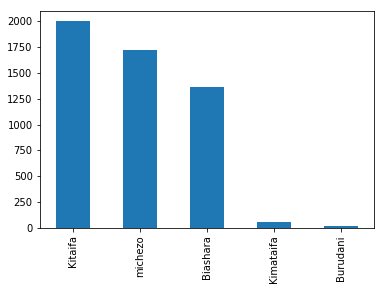

In [31]:
# Import matplotlib.pyplot
import matplotlib.pyplot as plt

train['category'].value_counts().plot(kind='bar')